In [11]:
# Import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
# Grab data from .txt file and transform into pd Data Frame

with open('data3.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df.head()

,0,1
0,3.066209,3.241796
1,0.719790,0.603624
2,4.878351,0.602319
3,-0.358323,2.671143
4,3.026148,3.303907


In [13]:
# Show data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80 non-null     float64
 1   1       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


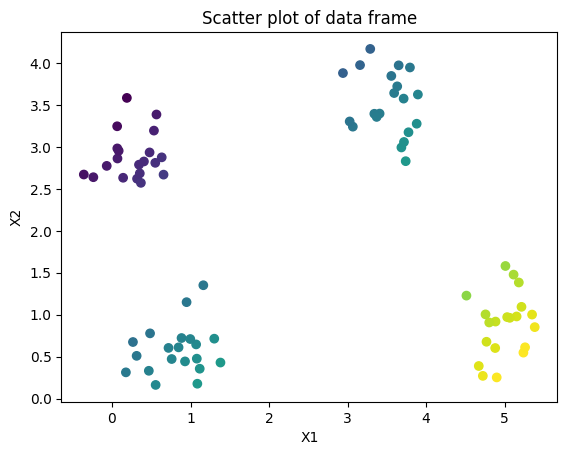

In [14]:
# Show original data

plt.scatter(df[0], df[1], c = df[0] - df[1], cmap = 'viridis')
plt.title('Scatter plot of data frame')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

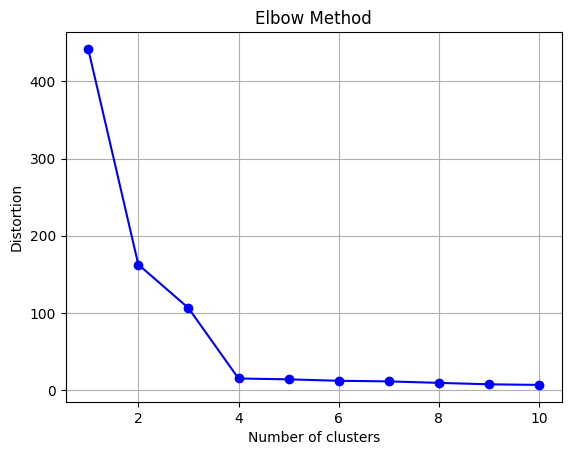

In [15]:
# Apply elbow method to find number of clusters

distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [16]:
# See 4 clusters

n_clusters = 4

In [17]:
# Scale data

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))
df.head()

,0,1
0,0.341207,0.979792
1,-0.856615,-1.049219
2,1.266285,-1.050223
3,-1.406980,0.540904
4,0.320756,1.027561


In [18]:
# Get describe statistics

df.describe()

,0,1
count,8.000000e+01,8.000000e+01
mean,4.440892e-17,-5.218048e-16
std,1.006309e+00,1.006309e+00
min,-1.406980e+00,-1.388582e+00
25%,-9.576302e-01,-9.933414e-01
50%,-1.210147e-01,8.332442e-02
75%,8.427934e-01,9.321821e-01
max,1.523289e+00,1.692656e+00


In [19]:
# Define generator to show step by step clustering algorithm

def kmeans(data, n_clusters, max_iter = 1000, tol = 1e-5):
    centroids = data.sample(n = n_clusters, replace = False)
    prev_inertia = None
    
    for _ in range(max_iter):
        # Count distances
        distances = np.sqrt(((data - centroids.iloc[0]) ** 2).sum(axis = 1))
        labels = np.zeros(len(data))
        
        for i in range(1, n_clusters):
            new_distances = np.sqrt(((data - centroids.iloc[i]) ** 2).sum(axis = 1))
            labels[new_distances < distances] = i
            distances[new_distances < distances] = new_distances[new_distances < distances]
        
        # Count sum of inner clusters distances between objects
        inertia = 0
        for i in range(n_clusters):
            inertia += ((data[labels == i] - centroids.iloc[i]) ** 2).sum().sum()
        
        if prev_inertia is not None and abs(inertia - prev_inertia) < tol:
            break
        
        prev_inertia = inertia
        
        # Recount centroids
        new_centroids = pd.DataFrame([data[labels == i].mean(axis = 0) for i in range(n_clusters)])
        centroids = new_centroids
        
        yield labels, centroids

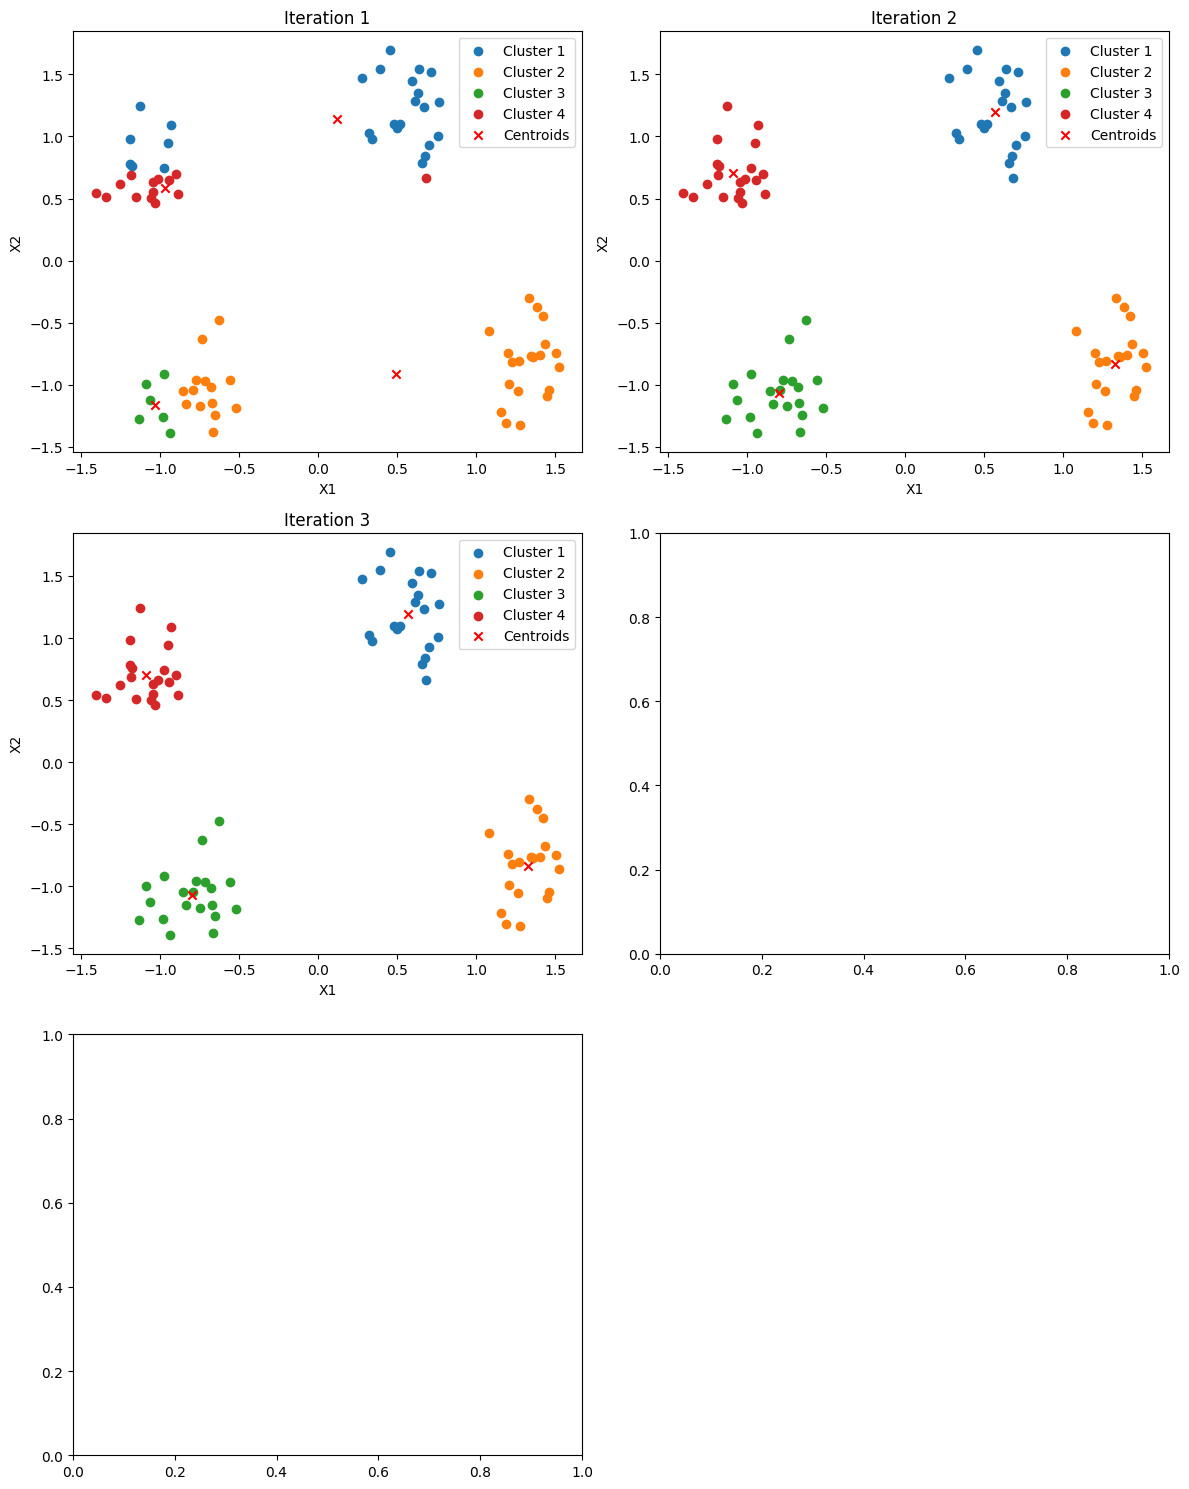

In [20]:
# Apply k-means & plot step-by-step clustering algorithm work

max_iter = 10
kmeans_gen = kmeans(df, n_clusters, max_iter = max_iter)

num_plots = len(list(kmeans_gen))
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
axes = axes.flatten()

kmeans_gen = kmeans(df, n_clusters, max_iter = max_iter)

for i, (labels, centroids) in enumerate(kmeans_gen):
    for cluster in range(n_clusters):
        axes[i].scatter(df.iloc[labels == cluster, 0], 
                        df.iloc[labels == cluster, 1], 
                        label = f'Cluster {cluster + 1}')
    
    axes[i].scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='x', color='red', label='Centroids')
    axes[i].set_xlabel("X1")
    axes[i].set_ylabel("X2")
    axes[i].set_title(f'Iteration {i + 1}')
    axes[i].legend()

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

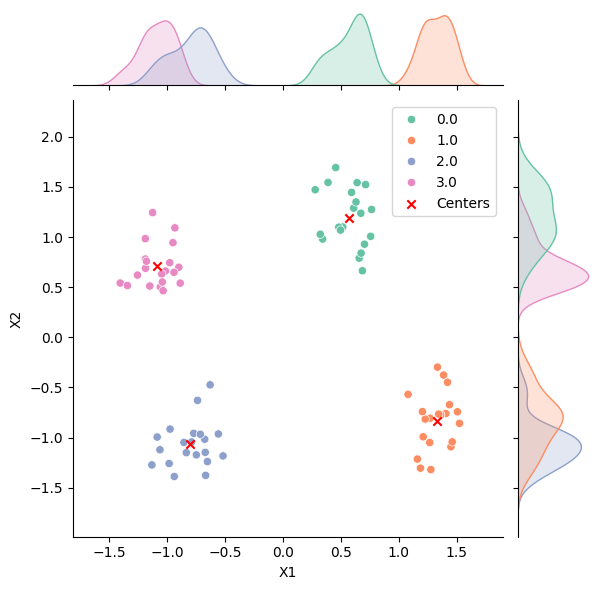

In [21]:
# Plot join plot

sns.jointplot(x = df.iloc[:, 0], y = df.iloc[:, 1], kind = "scatter", hue = labels, palette = "Set2", height = 6)
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color = 'r', marker = 'x', label = 'Centers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()